In [8]:
import math
# import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
plt.style.use("seaborn")

In [9]:
data = pd.read_csv("Final TrainingSet.csv")
data.index = data['Date']
data.index = pd.to_datetime(data.index)

data['Ticker_Pair'].unique()[41:]

array(['IJH_ACWI', 'EWT_IVV', 'IJH_TOK', 'EWT_IJH', 'IHF_ILCG', 'EWT_IWV',
       'IWM_WOOD', 'IJH_WOOD', 'IVV_ACWI', 'EWT_IWB', 'IYH_ACWI'],
      dtype=object)

Text(0, 0.5, 'Spread')

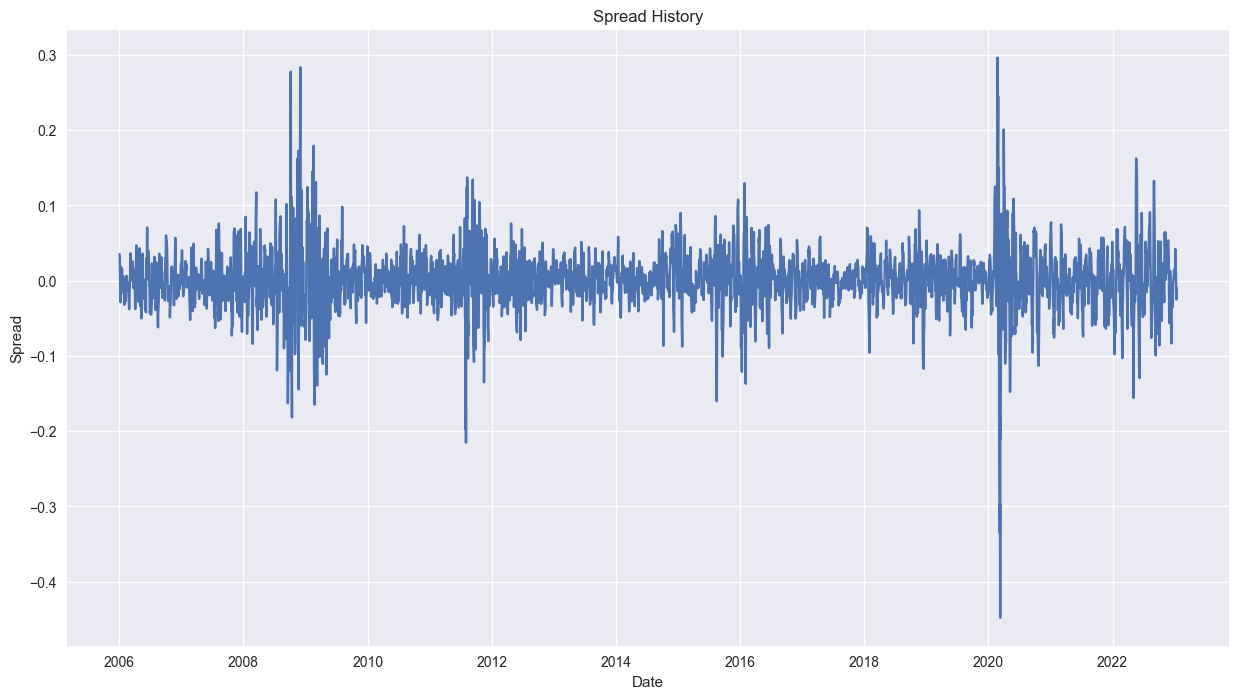

In [10]:
spread_data = data[data['Ticker_Pair'] == '*XFN_IJH']
spread_data  = spread_data['Y_Fwd_Total_Ret_Pct_5'].dropna()
data_sub = spread_data[(spread_data.index > '2014-01-01') & (spread_data.index < '2021-01-01')]
data_sub

plt.figure(figsize=(15, 8))
plt.title('Spread History')
plt.plot(spread_data)
plt.xlabel('Date')
plt.ylabel('Spread')


In [11]:
def output_data(input_data):    
    close_prices = input_data
    values = close_prices.values
    training_len = len(input_data[(input_data.index < '2017-01-01')])

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_len, :]

    x_train = []
    y_train = []

    window_size = 10
    for i in range(window_size, len(train_data)):
        x_train.append(train_data[i - window_size:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # test_data = scaled_data[training_len-window_size: , : ]
    test_data = scaled_data
    x_test = []
    # y_test = values[training_len:]
    y_test = values

    for i in range(window_size, len(test_data)):
        x_test.append(test_data[i - window_size:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    return x_train, y_train, x_test, y_test, scaler

x_train, y_train, x_test, y_test, scaler = output_data(spread_data)

def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], 1)))
    # model.add(layers.Dropout(.2))
    model.add(layers.Dense(25))
    # model.add(layers.Dropout(.1))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

def run_LSTM(x_train, y_train, x_test, scaler, pair):
    model = create_model()
    model.fit(x_train, y_train, batch_size= 1, epochs=20)

    checkpoint_path = "{}-cp-weight.ckpt".format(pair)
    # checkpoint_dir = os.path.dirname(checkpoint_path)
    model.save_weights(checkpoint_path)
    
    preds = model.predict(x_test)
    preds = scaler.inverse_transform(preds)
    
    plt.plot(preds)
    
    return preds

def plot_spreads(spread_data, preds):
    data = spread_data
    training_len = len(data[(data.index < '2017-01-01')])
    train = data[:training_len]
    # test = pd.DataFrame(data[training_len:])
    test = pd.DataFrame(data)[10:]
    test['Predictions'] = preds
    plt.figure(figsize=(16,8))
    plt.title('Spread prediction by LSTM')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    # plt.plot(train)
    plt.plot(test)
    # plt.plot(preds)
    plt.legend(['Test', 'Predictions'], loc='upper right')
    plt.show()

    return test



In [12]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17185636842770456851
xla_global_id: -1
]


41 IYK_ACWI
Epoch 1/20
2197/2197 [==============================] - 36s 13ms/step - loss: 0.5487
Epoch 2/20
2197/2197 [==============================] - 26s 12ms/step - loss: 0.4308
Epoch 3/20
2197/2197 [==============================] - 26s 12ms/step - loss: 0.4133
Epoch 4/20
2197/2197 [==============================] - 27s 12ms/step - loss: 0.3886
Epoch 5/20
2197/2197 [==============================] - 27s 12ms/step - loss: 0.3707
Epoch 6/20
2197/2197 [==============================] - 37s 17ms/step - loss: 0.3472
Epoch 7/20
2197/2197 [==============================] - 40s 18ms/step - loss: 0.3467
Epoch 8/20
2197/2197 [==============================] - 32s 15ms/step - loss: 0.3449
Epoch 9/20
2197/2197 [==============================] - 29s 13ms/step - loss: 0.3178
Epoch 10/20
2197/2197 [==============================] - 28s 13ms/step - loss: 0.3327
Epoch 11/20
2197/2197 [==============================] - 27s 12ms/step - loss: 0.3126
Epoch 12/20
2197/2197 [============================

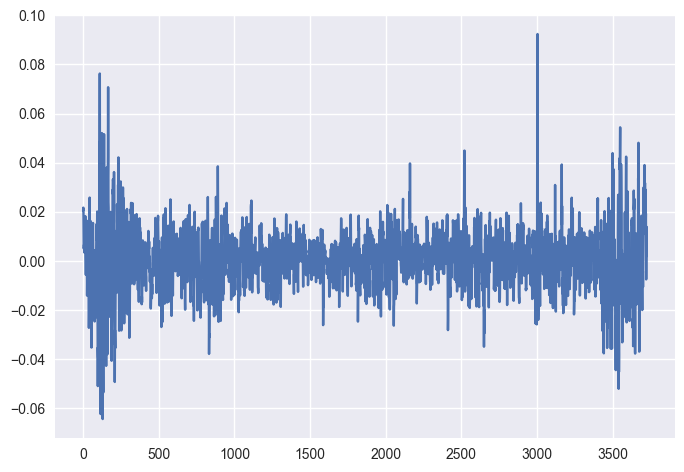

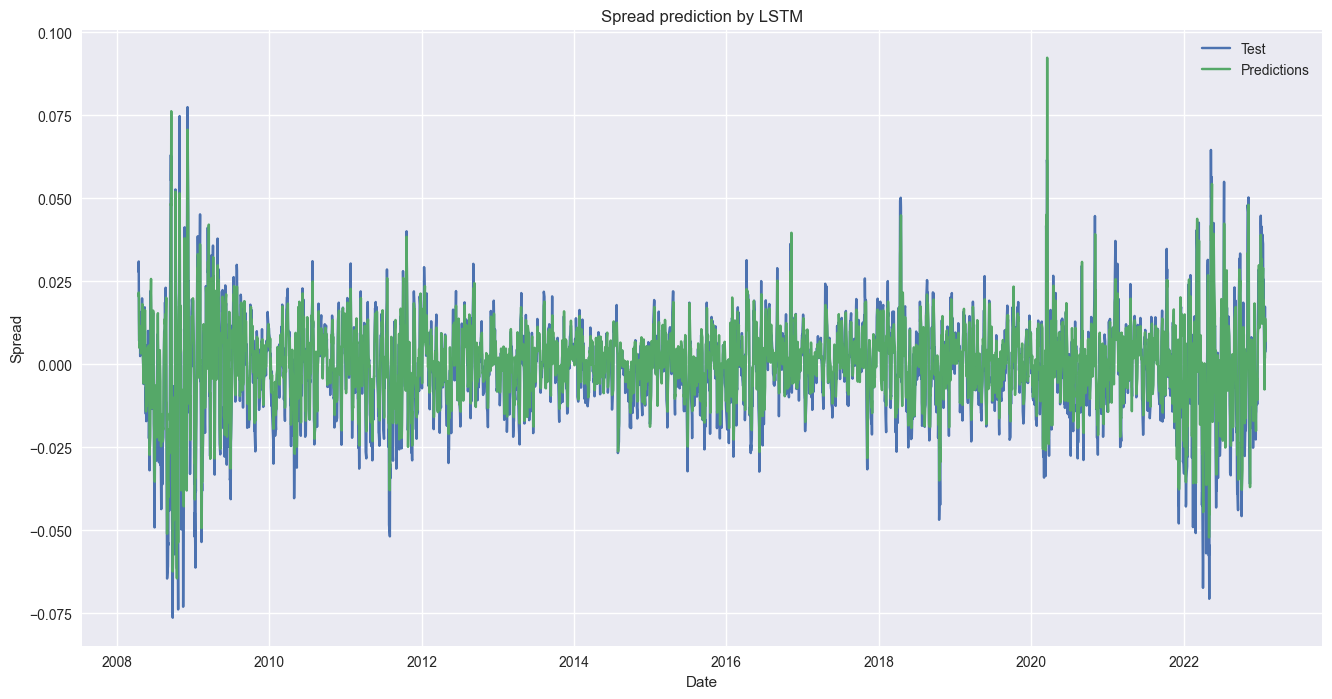

42 EWG_THD
Epoch 1/20
2197/2197 [==============================] - 32s 12ms/step - loss: 0.7874
Epoch 2/20
2197/2197 [==============================] - 27s 12ms/step - loss: 0.7082
Epoch 3/20
2197/2197 [==============================] - 27s 12ms/step - loss: 0.6220
Epoch 4/20
2197/2197 [==============================] - 27s 12ms/step - loss: 0.5964
Epoch 5/20
2197/2197 [==============================] - 26s 12ms/step - loss: 0.5863
Epoch 6/20
2197/2197 [==============================] - 29s 13ms/step - loss: 0.5643
Epoch 7/20
2197/2197 [==============================] - 28s 13ms/step - loss: 0.5316
Epoch 8/20
2197/2197 [==============================] - 28s 13ms/step - loss: 0.5039
Epoch 9/20
2197/2197 [==============================] - 29s 13ms/step - loss: 0.4937
Epoch 10/20
2197/2197 [==============================] - 28s 13ms/step - loss: 0.4866
Epoch 11/20
2197/2197 [==============================] - 28s 13ms/step - loss: 0.4887
Epoch 12/20
2197/2197 [=============================

KeyboardInterrupt: 

In [15]:
for i,pair in enumerate(data['Ticker_Pair'].unique()[41:]):
    print(41+i, pair)
    spread_data = data[data['Ticker_Pair'] == pair]
    spread_data = spread_data['Y_Fwd_Total_Ret_Pct_5'].dropna()
    x_train, y_train, x_test, y_test, scaler = output_data(spread_data)
    pair = pair.strip("*")
    predictions = run_LSTM(x_train, y_train, x_test, scaler, pair)
    df = plot_spreads(spread_data, predictions)
    # df = pd.DataFrame(predictions)
    # training_len = len(spread_data[(spread_data.index < '2017-01-01')])
    # train = spread_data[:training_len]s
    # # test = pd.DataFrame(spread_data[training_len:])
    # test = pd.DataFrame(spread_data[10:])
    # df.index = test.index
    # df.columns = ["Predicted Spread"]
    df.to_csv("Pair {} Predictions.csv".format(pair))